# Imports
In this section we import the necessary libraries for the model.

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Data Pre-processing
The data for this model can be found [here](https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset). Once the data has been imported we define the `load_and_flatten` function which loads images from a directory, converts them to greyscale, resizes it to 48x48 pixels and stores it into a 1 dimensional array. This is done to prepare the images for our Neural Network. After loading training and test datasets, pixel values are normalized to [0, 1], and string labels (e.g. "Malignant") are encoded as integers (e.g., 0, 1) using the LabelEncoder for model compatibility.

In [27]:
def load_and_flatten(directory):
    images = []
    labels = []
    for cell in os.listdir(directory):
        cell_dir = os.path.join(directory, cell)
        if os.path.isdir(cell_dir):
            for img_file in os.listdir(cell_dir):
                img_path = os.path.join(cell_dir, img_file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                img = cv2.resize(img, (48, 48))              # Resize to 48x48
                images.append(img.flatten())                 # Flatten to 1D array
                labels.append(cell)                       # Original string labels
    return np.array(images), np.array(labels)

X_train, Y_train = load_and_flatten("train")
X_test, Y_test = load_and_flatten("test")

X_train = X_train / 255.0
X_test = X_test / 255.0

le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.transform(Y_test)

# Modelling
Once the data has been pre-processed we fit the data to our neural network.

In [28]:
nn = MLPClassifier(random_state=42)
nn.fit(X_train, Y_train_encoded)

MLPClassifier(random_state=42)

# Predictions
Once data has been fitted to the model we make our predictions. After making these predictions we use the `inverse_transform` function to transform labels back to their original encoding. After this we create a classification report and choose 5 random images to display and compare their true values against their predicted values.

              precision    recall  f1-score   support

      Benign       0.71      0.94      0.81      1000
   Malignant       0.91      0.61      0.73      1000

    accuracy                           0.77      2000
   macro avg       0.81      0.77      0.77      2000
weighted avg       0.81      0.77      0.77      2000



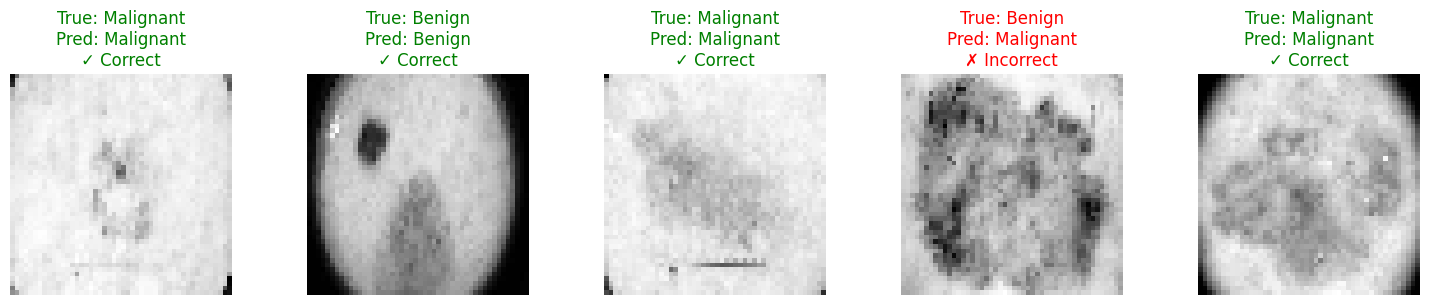

In [41]:
Y_pred_encoded = nn.predict(X_test)
Y_pred = le.inverse_transform(Y_pred_encoded)

print(classification_report(Y_test, Y_pred))

random_indices = np.random.choice(len(X_test), size=5, replace=False)

# Create visualization
plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i+1)

    # Display image
    plt.imshow(X_test[idx].reshape(48, 48), cmap='gray')

    # Get prediction info
    true_label = Y_test[idx]
    pred_label = Y_pred[idx]
    is_correct = true_label == pred_label

    # Format title with color coding
    status = "✓ Correct" if is_correct else "✗ Incorrect"
    color = "green" if is_correct else "red"

    plt.title(f"True: {true_label}\nPred: {pred_label}\n{status}", color=color)
    plt.axis('off')                                    # Hide axes
plt.tight_layout()
plt.show()